In [ ]:
import os
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import shutil
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
%matplotlib inline

In [ ]:
# membuat direktori
base_dir = '/content/drive/MyDrive/imageset/'
cancer_dir = '/content/drive/MyDrive/imageset/cancer'
normal_dir ='/content/drive/MyDrive/imageset/normal'

In [ ]:
label = ['cancer', 'normal']

In [ ]:
import cv2
from tqdm import tqdm

X=[]
Z=[]

lebar_gambar = 300
tinggi_gambar = 300

def data_training(label, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = label
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (lebar_gambar, tinggi_gambar))

    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
data_training('cancer',cancer_dir)
print(len(X))

100%|██████████| 52/52 [00:00<00:00, 265.85it/s]

52


In [ ]:
data_training('normal',normal_dir)
print(len(X))

100%|██████████| 50/50 [00:00<00:00, 279.22it/s]

102


In [ ]:
le=LabelEncoder()
X=np.array(X)
X=X/255
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
red_lr= ReduceLROnPlateau(monitor='binary_accuracy',patience=3,verbose=1,factor=0.1)

In [ ]:
x_train.shape

(81, 300, 300, 3)

In [ ]:
x_test.shape

(21, 300, 300, 3)

In [ ]:
y_train.shape

(81, 2)

In [ ]:
y_test.shape

(21, 2)

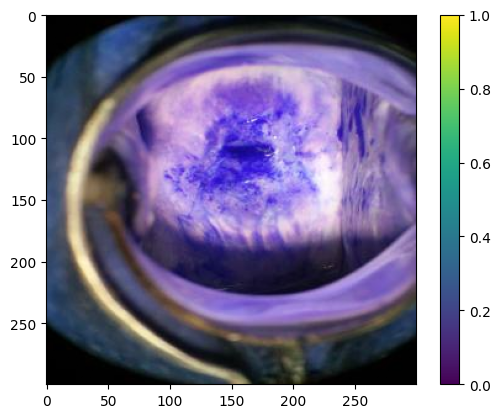

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 512)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      294976    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 256)       0

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

datagen.fit(x_train)

In [ ]:
history = model.fit(
      datagen.flow(x_train, y_train, batch_size=40),
      steps_per_epoch= len(x_train)/35,  # berapa batch yang akan dieksekusi pada setiap epoch
      validation_data= (x_test, y_test), # menampilkan akurasi pengujian data validasi
      epochs=5,
      callbacks=[red_lr]#, early_stop]
      )

Epoch 1/5


In [ ]:
for i in history.history:
  print(i)

loss
binary_accuracy
val_loss
val_binary_accuracy
lr


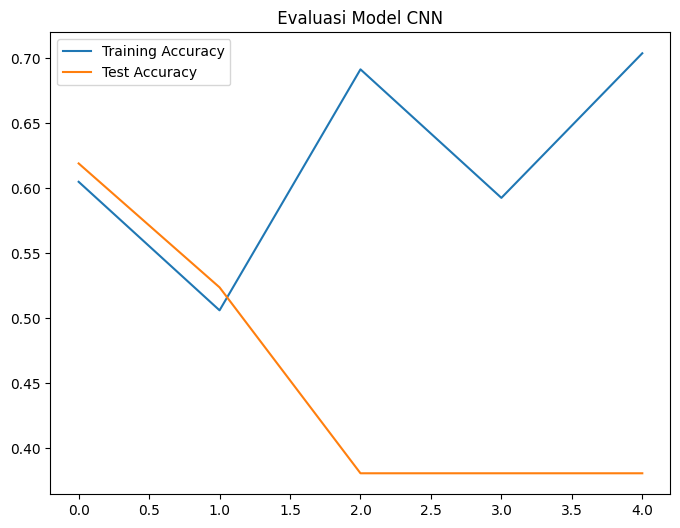

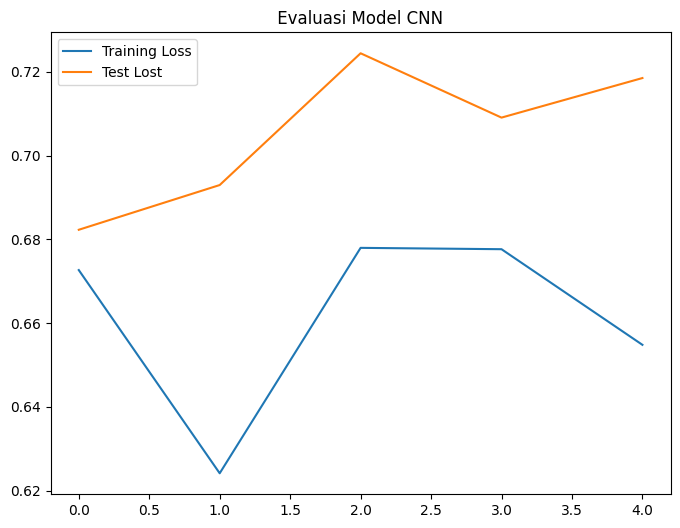

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Test Accuracy')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Lost')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 2s 2s/step - loss: 0.7185 - binary_accuracy: 0.3810
Test accuracy: 0.380952388048172


In [ ]:
predictions = model.predict(x_test)
predictions

1/1 [==============================] - 2s 2s/step


array([[0.38420668, 0.61579335],
       [0.39753625, 0.60246366],
       [0.38185316, 0.61814684],
       [0.4097545 , 0.5902455 ],
       [0.39537564, 0.6046244 ],
       [0.41137183, 0.5886281 ],
       [0.39039558, 0.6096045 ],
       [0.4057593 , 0.5942408 ],
       [0.42260087, 0.57739913],
       [0.39244053, 0.60755944],
       [0.39270675, 0.6072932 ],
       [0.38787928, 0.61212075],
       [0.3965527 , 0.6034472 ],
       [0.39088953, 0.6091105 ],
       [0.37527373, 0.62472624],
       [0.41037878, 0.5896211 ],
       [0.38234785, 0.6176521 ],
       [0.39563915, 0.6043608 ],
       [0.39500433, 0.60499567],
       [0.39388674, 0.6061133 ],
       [0.39151067, 0.60848933]], dtype=float32)

In [ ]:
predictions[0]

array([0.38420668, 0.61579335], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
y_test[0]

array([1., 0.], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  truth = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == truth:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label[predicted_label],
                                               100*np.max(predictions_array),
                                               label[truth]),
                                               color=color)

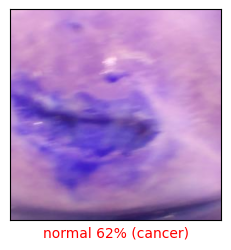

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.show()

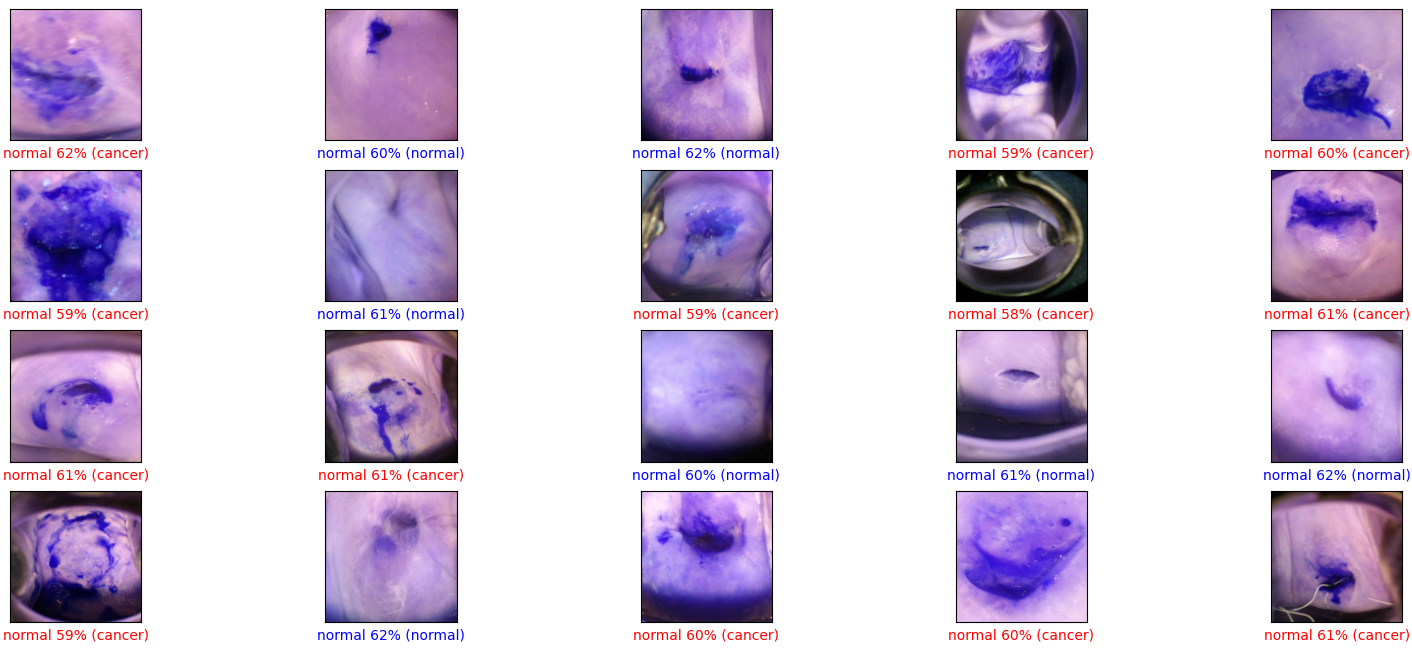

In [ ]:
num_rows = 4
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

uploaded = files.upload()

for path in uploaded.keys():
  img = image.load_img(path, target_size=(300,300))
  gambar = image.img_to_array(img)
  gambar = gambar[np.newaxis,:,:,:]
  """gambar = np.expand_dims(gambar, axis=0)
  gambar = np.vstack([gambar])"""
  prediksi = model.predict(gambar)
  hasil = np.argmax(prediksi)

  imgplot = plt.imshow(img)
  plt.title("\nHasil Prediksi Gambar {}".format(path),fontsize=18)
  plt.xlabel("{}".format(label[hasil]), fontsize=15)
  plt.show()